# 实验报告 - 随机森林算法在泰坦尼克号数据中分类

## 导入数据

### 导入所需的库

In [71]:
import pandas as pd

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
import matplotlib.pyplot as plt

### 导入数据集 探索数据集

In [2]:
data = pd.read_csv(r"/Users/zhboat/Desktop/Machine Learning/data.csv",index_col= 0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 查看数据集信息，并分析

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


可以看到数据集一共有891个样本，10个特征
<p>
其中‘Age’，‘Cabin’，‘Embarked’少于891个样本，故存在缺失情况
<p>
‘Name’，‘Sex’，‘Ticket’，‘Cabin’，‘Embared’为object类型，无法直接带入模型处理，需要对其进行特征编码

## 数据预处理

### 删除缺失值过多的列，和观察判断来说和预测的y没有关系的列

In [4]:
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

### 查看数据集的信息

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


此时存在'Age'和'Embarked'需要填补缺失值
<p>
'Sex'和'Embarked'需要特征编码
<p>
由于'Age'特征属于关键数据，缺失的部分可采用均值进行填补
<p>
特征'Embarked'只有2个缺失值，缺失值个数较少，可直接删除

### 对Age进行填补，删除有缺失值的所有特征

In [6]:
data["Age"] = data["Age"].fillna(data["Age"].mean())
data = data.dropna()
data.info

<bound method DataFrame.info of              Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
PassengerId                                                               
1                   0       3    male  22.000000      1      0   7.2500   
2                   1       1  female  38.000000      1      0  71.2833   
3                   1       3  female  26.000000      0      0   7.9250   
4                   1       1  female  35.000000      1      0  53.1000   
5                   0       3    male  35.000000      0      0   8.0500   
...               ...     ...     ...        ...    ...    ...      ...   
887                 0       2    male  27.000000      0      0  13.0000   
888                 1       1  female  19.000000      0      0  30.0000   
889                 0       3  female  29.699118      1      2  23.4500   
890                 1       1    male  26.000000      0      0  30.0000   
891                 0       3    male  32.000000      0      0   7.7

### 查看数据集的信息

此时可以看到数据集样本从891减少到了889个，不存在缺失值

### 数据转换

将二分类变量转换为数值型变量
astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同

astype可以将文本类转换为数字，用这个方式可以很便捷地将二分类特征转换为0~1

### 将二分类变量转换int类型变量，使用0，1分别代替

In [7]:
data["Sex"] = (data["Sex"]== "male").astype("int")

### 将三分类变量转换int类型变量，使用0，1，2分别代替

In [8]:
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

### 查看处理后的数据集 

In [9]:
data.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,0
2,1,1,0,38.000000,1,0,71.2833,1
3,1,3,0,26.000000,0,0,7.9250,0
4,1,1,0,35.000000,1,0,53.1000,0
5,0,3,1,35.000000,0,0,8.0500,0
6,0,3,1,29.699118,0,0,8.4583,2
7,0,1,1,54.000000,0,0,51.8625,0
8,0,3,1,2.000000,3,1,21.0750,0
9,1,3,0,27.000000,0,2,11.1333,0


## 划分数据集

### 按标签名称提取标签和特征矩阵
### 分别将特征矩阵命名为x，标签命名为y

In [10]:
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

### 按3：7的比例将数据集划分为训练集和测试集

In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

### 查看划分后的训练集和测试集

In [12]:
Xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
197,3,1,29.699118,0,0,7.7500,2
366,3,1,30.000000,0,0,7.2500,0
852,3,1,74.000000,0,0,7.7750,0
430,3,1,32.000000,0,0,8.0500,0
360,3,0,29.699118,0,0,7.8792,2
...,...,...,...,...,...,...,...
12,1,0,58.000000,0,0,26.5500,0
575,3,1,16.000000,0,0,8.0500,0
171,1,1,61.000000,0,0,33.5000,0


可以看到分好的数据索引并没有顺序排列

### 修正测试集和训练集的索引

In [13]:
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

### 查看按索引顺序分好的测试集和训练集

In [14]:
Xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,29.699118,0,0,7.7500,2
1,3,1,30.000000,0,0,7.2500,0
2,3,1,74.000000,0,0,7.7750,0
3,3,1,32.000000,0,0,8.0500,0
4,3,0,29.699118,0,0,7.8792,2
...,...,...,...,...,...,...,...
617,1,0,58.000000,0,0,26.5500,0
618,3,1,16.000000,0,0,8.0500,0
619,1,1,61.000000,0,0,33.5000,0
620,3,1,47.000000,0,0,9.0000,0


修正好之后的数据索引则是按顺序从 0-621，共 622 个训练样本

## 建立初始模型

In [16]:
# 决策树
clf = DecisionTreeClassifier(random_state=0)
# 随机森林
rfc = RandomForestClassifier(random_state=0)
# 训练模型
clf = clf.fit(Xtrain, Ytrain.values.flatten())
rfc = rfc.fit(Xtrain, Ytrain.values.flatten())
# 模型准确率
score_c0 = clf.score(Xtest, Ytest.values.flatten())
score_r0 = rfc.score(Xtest, Ytest.values.flatten())

# 查看准确率
print("DecisionTree:{}".format(score_c0),
      "RandomForest:{}".format(score_r0))
# 不显示警告信息
import warnings
warnings.filterwarnings("ignore")

DecisionTree:0.7602996254681648 RandomForest:0.797752808988764


可以看出，在初始状态下，随机森林算法的准确率比决策树要高一点

## 对决策树和随机森林模型进行调参

### 调整决策树算法的Max_depth参数

0.8314606741573034 4


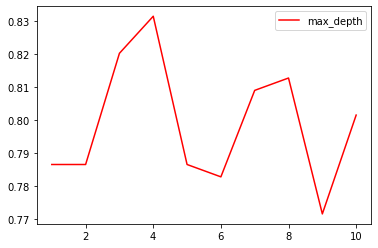

In [17]:
import matplotlib.pyplot as plt
score_c = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state = 25,
                                 max_depth = i + 1,
                                 criterion = "entropy",
                                 splitter = "random"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    score_c.append(score)


print(max(score_c),score_c.index(max(score_c))+1)

plt.plot(range(1,11),score_c,color="red",label="max_depth")

# 画出学习曲线
plt.legend()
plt.show()

从图中可以看到，当max_depth = 4时，模型的准确率最高

### 调整随机森林算法的n_estimators参数

0.8014981273408239 11


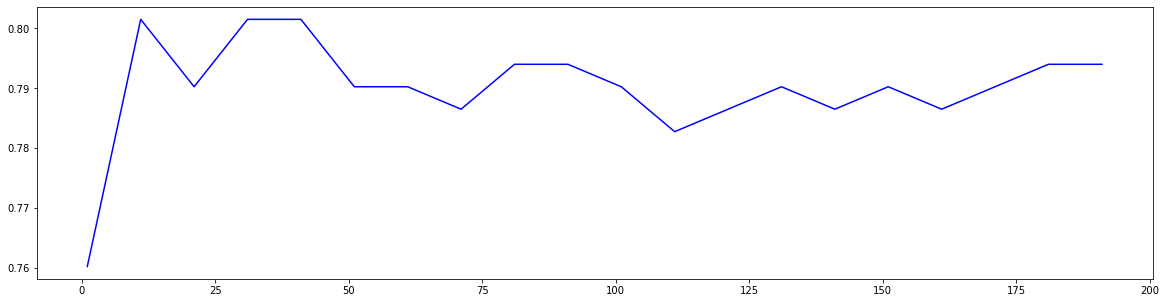

In [40]:
score_r = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(random_state = 90,
                                 n_estimators= i+1)
    rfc = rfc.fit(Xtrain, Ytrain)
    score = rfc.score(Xtest, Ytest)
    score_r.append(score)

print(max(score_r),(score_r.index(max(score_r))*10) +1)


plt.figure(figsize = [20,5])
plt.plot(range(1,201,10),score_r,color="blue",label="n_estimators")

# 画出学习曲线
plt.show()

0.8127340823970037 16


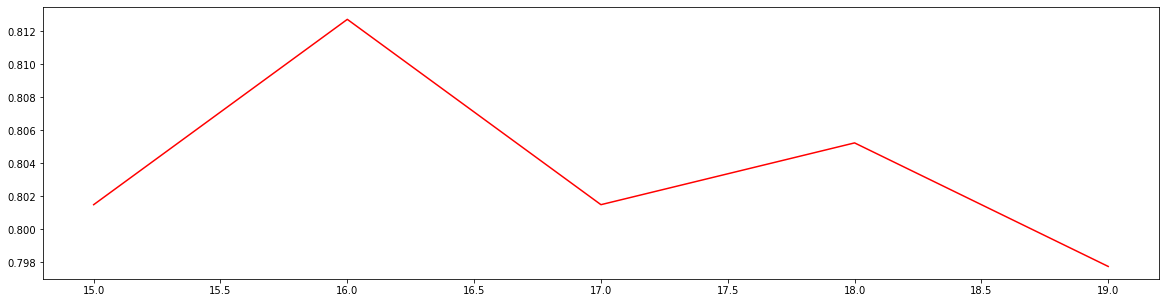

In [47]:
score_r = []
for i in range(15,20):
    rfc = RandomForestClassifier(random_state = 90,
                                 n_estimators = i,
                                 n_jobs = -1)
    rfc = rfc.fit(Xtrain, Ytrain)
    score = rfc.score(Xtest, Ytest)
    score_r.append(score)

print(max(score_r),([*range(15,20)][score_r.index(max(score_r))]))


plt.figure(figsize = [20,5])
plt.plot(range(15,20),score_r,color="red",label="n_estimators")

# 画出学习曲线
plt.show()

当n_estimators = 16时，准确率最高

In [67]:
kf = StratifiedKFold(n_splits=5)
clf = DecisionTreeClassifier(max_depth = 4,random_state = 90)

# 交叉验证
score = cross_val_score(clf,X,y,cv = kf).mean()
score

0.8043166381006792

In [72]:
kf = StratifiedKFold(n_splits=30)
rfc = RandomForestClassifier(n_estimators = 16,random_state = 90)

# 交叉验证
score = cross_val_score(rfc,X,y,cv = kf).mean()
score

0.8155555555555555

### 得出模型的最终结果

由实验可知，随记森林算法模型准确率更高，效果更好